In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)



In [2]:
nasa = pd.read_csv("NASAexoplanet.csv")
nasa

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


In [3]:
#Assessing the data
#structure/shape
#scope and completeness
#temporality
#faithfulness
nasa.describe()

,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity
count,5233.000000,5089.000000,5250.000000,5227.000000,5233.000000,4961.000000,5.250000e+03,5250.000000
mean,2167.168737,12.683738,2015.732190,6.434812,1.015121,6.962942,4.791509e+02,0.063568
std,3245.522087,3.107571,4.307336,12.972727,0.603479,138.673600,1.680445e+04,0.141424
min,4.000000,0.872000,1992.000000,0.020000,0.200000,0.004400,2.737851e-04,-0.520000
25%,389.000000,10.939000,2014.000000,1.804000,0.325000,0.053000,1.259411e-02,0.000000
50%,1371.000000,13.543000,2016.000000,4.170140,1.120000,0.102800,3.449692e-02,0.000000
75%,2779.000000,15.021000,2018.000000,8.000000,1.410000,0.286000,1.442163e-01,0.060000
max,27727.000000,44.610000,2023.000000,752.000000,6.900000,7506.000000,1.101370e+06,0.950000


In [4]:
nasa.describe(include = ["O"])
#missing data
#distance - 17
#stellar magnitude - 161
#mass multiplier - 23
#radius multiplier - 17
#orbital radius - 289
#mass_wrt - 23
#radius_wrt - 17


,name,planet_type,mass_wrt,radius_wrt,detection_method
count,5250,5250,5227,5233,5250
unique,5250,5,2,2,11
top,11 Comae Berenices b,Neptune-like,Earth,Jupiter,Transit
freq,1,1825,3586,3310,3945


In [5]:
nasa.isna().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
5245    False
5246    False
5247    False
5248    False
5249    False
Length: 5250, dtype: bool

In [6]:
#Cleaning data
missing_data = nasa["orbital_radius"].isna()
#missing_data = nasa_exo["distance"].isna()
nasa2 = nasa[~missing_data]
nasa2

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


In [7]:
missing_data = nasa2["distance"].isna()
nasa3 = nasa2[~missing_data]
nasa3

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


In [8]:
missing_data = nasa["stellar_magnitude"].isna()
nasa4 = nasa3[~missing_data]
nasa4

/tmp/ipykernel_595/1065416320.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nasa4 = nasa3[~missing_data]


,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


In [9]:
missing_data = nasa["mass_multiplier"].isna()
nasa5 = nasa4[~missing_data]
nasa5

/tmp/ipykernel_595/2764954486.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nasa5 = nasa4[~missing_data]


,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


In [10]:
missing_data = nasa["radius_multiplier"].isna()
nasa6 = nasa5[~missing_data]
nasa5

/tmp/ipykernel_595/350766048.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nasa6 = nasa5[~missing_data]


,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


In [11]:
missing_data = nasa["mass_wrt"].isna()
nasa7 = nasa6[~missing_data]
nasa7

/tmp/ipykernel_595/2649695994.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nasa7 = nasa6[~missing_data]


,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


In [12]:
missing_data = nasa["radius_wrt"].isna()
nasa_exo = nasa7[~missing_data]
nasa_exo

/tmp/ipykernel_595/2099458126.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nasa_exo = nasa7[~missing_data]


,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


In [13]:
#renaming columns
new_columns = ["name", "distance","stellar magnitude", "planet type", "year", "mass x", "mass ssc", "radius x", "radius ssc", "oribital radius", "orbital period", "eccentricity", "detection method"]
nasa_exo.columns = new_columns
nasa_exo

,name,distance,stellar magnitude,planet type,year,mass x,mass ssc,radius x,radius ssc,oribital radius,orbital period,eccentricity,detection method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


In [14]:
dup_filter = nasa_exo.duplicated()
nasa_exo[dup_filter]
#no duplicate rows

,name,distance,stellar magnitude,planet type,year,mass x,mass ssc,radius x,radius ssc,oribital radius,orbital period,eccentricity,detection method


In [15]:
nasa_exo.dtypes

name                  object
distance             float64
stellar magnitude    float64
planet type           object
year                   int64
mass x               float64
mass ssc              object
radius x             float64
radius ssc            object
oribital radius      float64
orbital period       float64
eccentricity         float64
detection method      object
dtype: object

In [16]:
nasa_exo["distance"] = nasa_exo["distance"].astype(int) #converting distance column to int
nasa_exo

,name,distance,stellar magnitude,planet type,year,mass x,mass ssc,radius x,radius ssc,oribital radius,orbital period,eccentricity,detection method
0,11 Comae Berenices b,304,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


Text(0, 0.5, 'Number of Exoplanets')

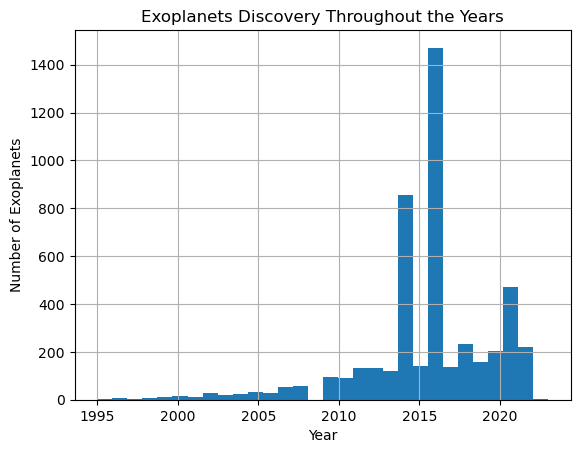

In [17]:
#Single variable distribution plots
nasa_exo["year"].hist(bins = 30)
plt.title("Exoplanets Discovery Throughout the Years")
plt.xlabel("Year")
plt.ylabel("Number of Exoplanets")

Text(0, 0.5, 'Number of Exoplanets')

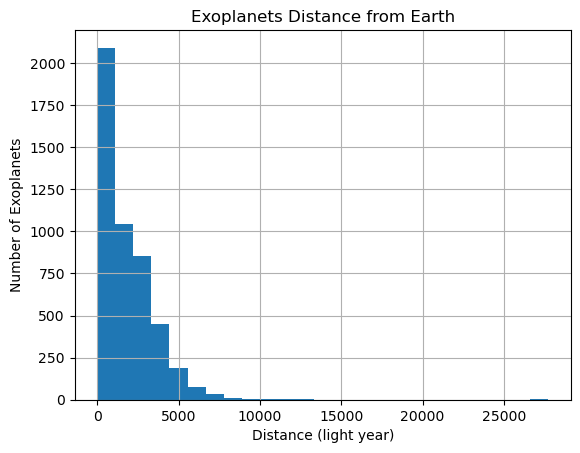

In [18]:
nasa_exo["distance"].hist(bins = 25)
plt.title("Exoplanets Distance from Earth")
plt.xlabel("Distance (light year)")
plt.ylabel("Number of Exoplanets")

Text(0, 0.5, '# of Exoplanets')

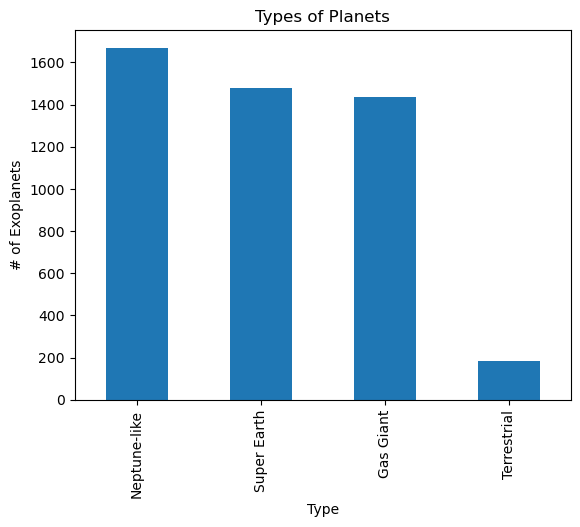

In [19]:
type_counts = nasa_exo["planet type"].value_counts()
type_counts.plot(kind = "bar")
plt.title("Types of Planets")
plt.xlabel("Type")
plt.ylabel("# of Exoplanets")

Text(0, 0.5, '# of Exoplanets')

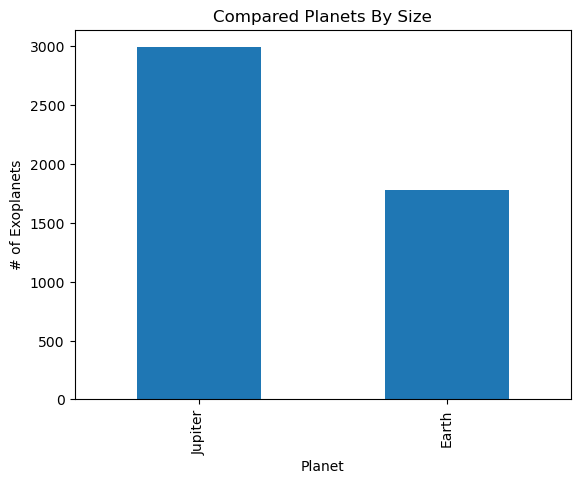

In [20]:
comparison_count= nasa_exo["radius ssc"].value_counts()
comparison_count.plot(kind = "bar")
plt.title("Compared Planets By Size")
plt.xlabel("Planet")
plt.ylabel("# of Exoplanets")

In [21]:
#multiple variable plots

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Brightness of Discovered Exoplanets Throughout the Years')

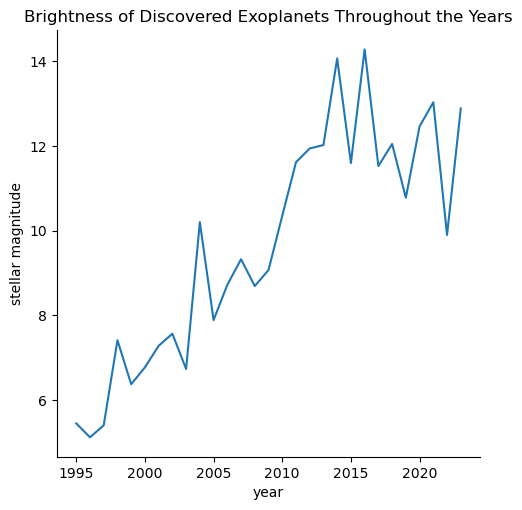

In [22]:
sns.relplot(x = "year", y = "stellar magnitude", kind = "line", ci = None, data = nasa_exo)
plt.title("Brightness of Discovered Exoplanets Throughout the Years")

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distance of Discovered Exoplanets Throughout the Years')

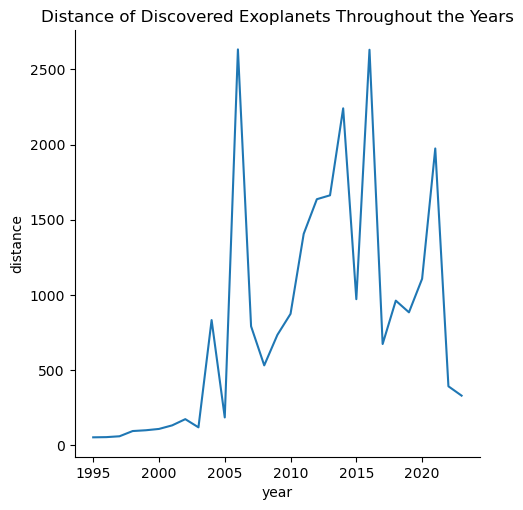

In [23]:
sns.relplot(x = "year", y = "distance", kind = "line", ci = None, data = nasa_exo)
plt.title("Distance of Discovered Exoplanets Throughout the Years")

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


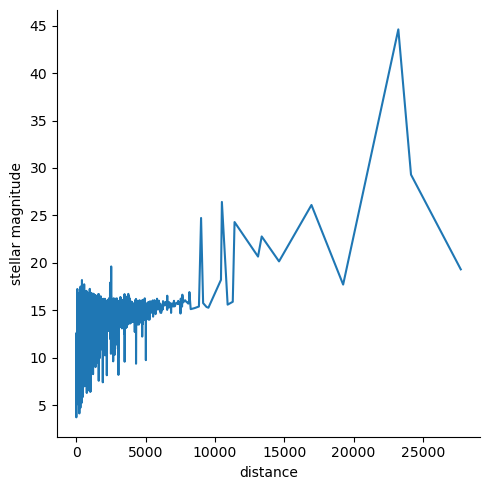

In [24]:
sns.relplot(x = "distance", y = "stellar magnitude", kind = "line", ci = None, data = nasa_exo)
#plt.title("Brightness of Discovered Exoplanets Throughout the Years")

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


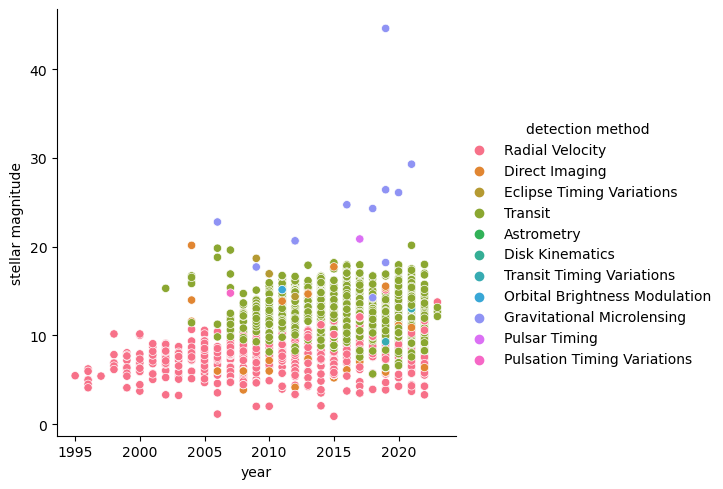

In [25]:
sns.relplot(x = "year", y = "stellar magnitude", hue = "detection method", data = nasa_exo)

In [26]:
#Project 2
#Machine Learning Models
nasa_exo

,name,distance,stellar magnitude,planet type,year,mass x,mass ssc,radius x,radius ssc,oribital radius,orbital period,eccentricity,detection method
0,11 Comae Berenices b,304,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


In [27]:
!pip install --user graphviz

Looking in links: /usr/share/pip-wheels


In [28]:
#Decision tree regression
import statsmodels.formula.api as smf
import numpy as np
#import graphviz

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline


In [29]:
nasa_exo_tree = pd.get_dummies(nasa_exo, columns = ["planet type", "mass ssc", "radius ssc", "detection method"], drop_first = True)
nasa_exo_tree

,name,distance,stellar magnitude,year,mass x,radius x,oribital radius,orbital period,eccentricity,planet type_Neptune-like,planet type_Super Earth,planet type_Terrestrial,mass ssc_Jupiter,radius ssc_Jupiter,detection method_Direct Imaging,detection method_Disk Kinematics,detection method_Eclipse Timing Variations,detection method_Gravitational Microlensing,detection method_Orbital Brightness Modulation,detection method_Pulsar Timing,detection method_Pulsation Timing Variations,detection method_Radial Velocity,detection method_Transit,detection method_Transit Timing Variations
0,11 Comae Berenices b,304,4.72307,2007,19.40000,1.080,1.290000,0.892539,0.23,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False
1,11 Ursae Minoris b,409,5.01300,2009,14.74000,1.090,1.530000,1.400000,0.08,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False
2,14 Andromedae b,246,5.23133,2008,4.80000,1.150,0.830000,0.508693,0.00,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False
3,14 Herculis b,58,6.61935,2002,8.13881,1.120,2.773069,4.800000,0.37,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False
4,16 Cygni B b,69,6.21500,1996,1.78000,1.200,1.660000,2.200000,0.68,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764,10.52100,2019,0.70900,1.373,0.044210,0.007940,0.04,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False
5246,YSES 2 b,357,10.88500,2021,6.30000,1.140,115.000000,1176.500000,0.00,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False
5247,YZ Ceti b,12,12.07400,2017,0.70000,0.913,0.016340,0.005476,0.06,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
5248,YZ Ceti c,12,12.07400,2017,1.14000,1.050,0.021560,0.008487,0.00,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False


In [30]:
#predicting stellar magnitude, name is irrelevant
x = nasa_exo_tree[["distance", "year", "mass x" , "radius x" , "oribital radius" , "orbital period","eccentricity"]]
x

,distance,year,mass x,radius x,oribital radius,orbital period,eccentricity
0,304,2007,19.40000,1.080,1.290000,0.892539,0.23
1,409,2009,14.74000,1.090,1.530000,1.400000,0.08
2,246,2008,4.80000,1.150,0.830000,0.508693,0.00
3,58,2002,8.13881,1.120,2.773069,4.800000,0.37
4,69,1996,1.78000,1.200,1.660000,2.200000,0.68
...,...,...,...,...,...,...,...
5245,764,2019,0.70900,1.373,0.044210,0.007940,0.04
5246,357,2021,6.30000,1.140,115.000000,1176.500000,0.00
5247,12,2017,0.70000,0.913,0.016340,0.005476,0.06
5248,12,2017,1.14000,1.050,0.021560,0.008487,0.00


In [31]:
x.dtypes

distance             int64
year                 int64
mass x             float64
radius x           float64
oribital radius    float64
orbital period     float64
eccentricity       float64
dtype: object

In [32]:
y = nasa_exo_tree["stellar magnitude"]
y

0        4.72307
1        5.01300
2        5.23133
3        6.61935
4        6.21500
          ...   
5245    10.52100
5246    10.88500
5247    12.07400
5248    12.07400
5249    12.07400
Name: stellar magnitude, Length: 4765, dtype: float64

In [33]:
model = DecisionTreeRegressor(max_depth = 3) #depth = how many layers
model = model.fit(x, y)

[Text(0.5, 0.875, 'x[0] <= 543.0\nsquared_error = 9.925\nsamples = 4765\nvalue = 12.693'),
 Text(0.25, 0.625, 'x[4] <= 0.185\nsquared_error = 9.213\nsamples = 1443\nvalue = 9.378'),
 Text(0.125, 0.375, 'x[4] <= 0.042\nsquared_error = 8.6\nsamples = 715\nvalue = 11.005'),
 Text(0.0625, 0.125, 'squared_error = 8.003\nsamples = 225\nvalue = 12.505'),
 Text(0.1875, 0.125, 'squared_error = 7.367\nsamples = 490\nvalue = 10.316'),
 Text(0.375, 0.375, 'x[5] <= 590.45\nsquared_error = 4.664\nsamples = 728\nvalue = 7.781'),
 Text(0.3125, 0.125, 'squared_error = 3.525\nsamples = 698\nvalue = 7.607'),
 Text(0.4375, 0.125, 'squared_error = 14.207\nsamples = 30\nvalue = 11.812'),
 Text(0.75, 0.625, 'x[0] <= 1804.5\nsquared_error = 3.389\nsamples = 3322\nvalue = 14.132'),
 Text(0.625, 0.375, 'x[6] <= 0.005\nsquared_error = 3.791\nsamples = 1320\nvalue = 13.163'),
 Text(0.5625, 0.125, 'squared_error = 2.822\nsamples = 982\nvalue = 13.524'),
 Text(0.6875, 0.125, 'squared_error = 5.128\nsamples = 338\nv

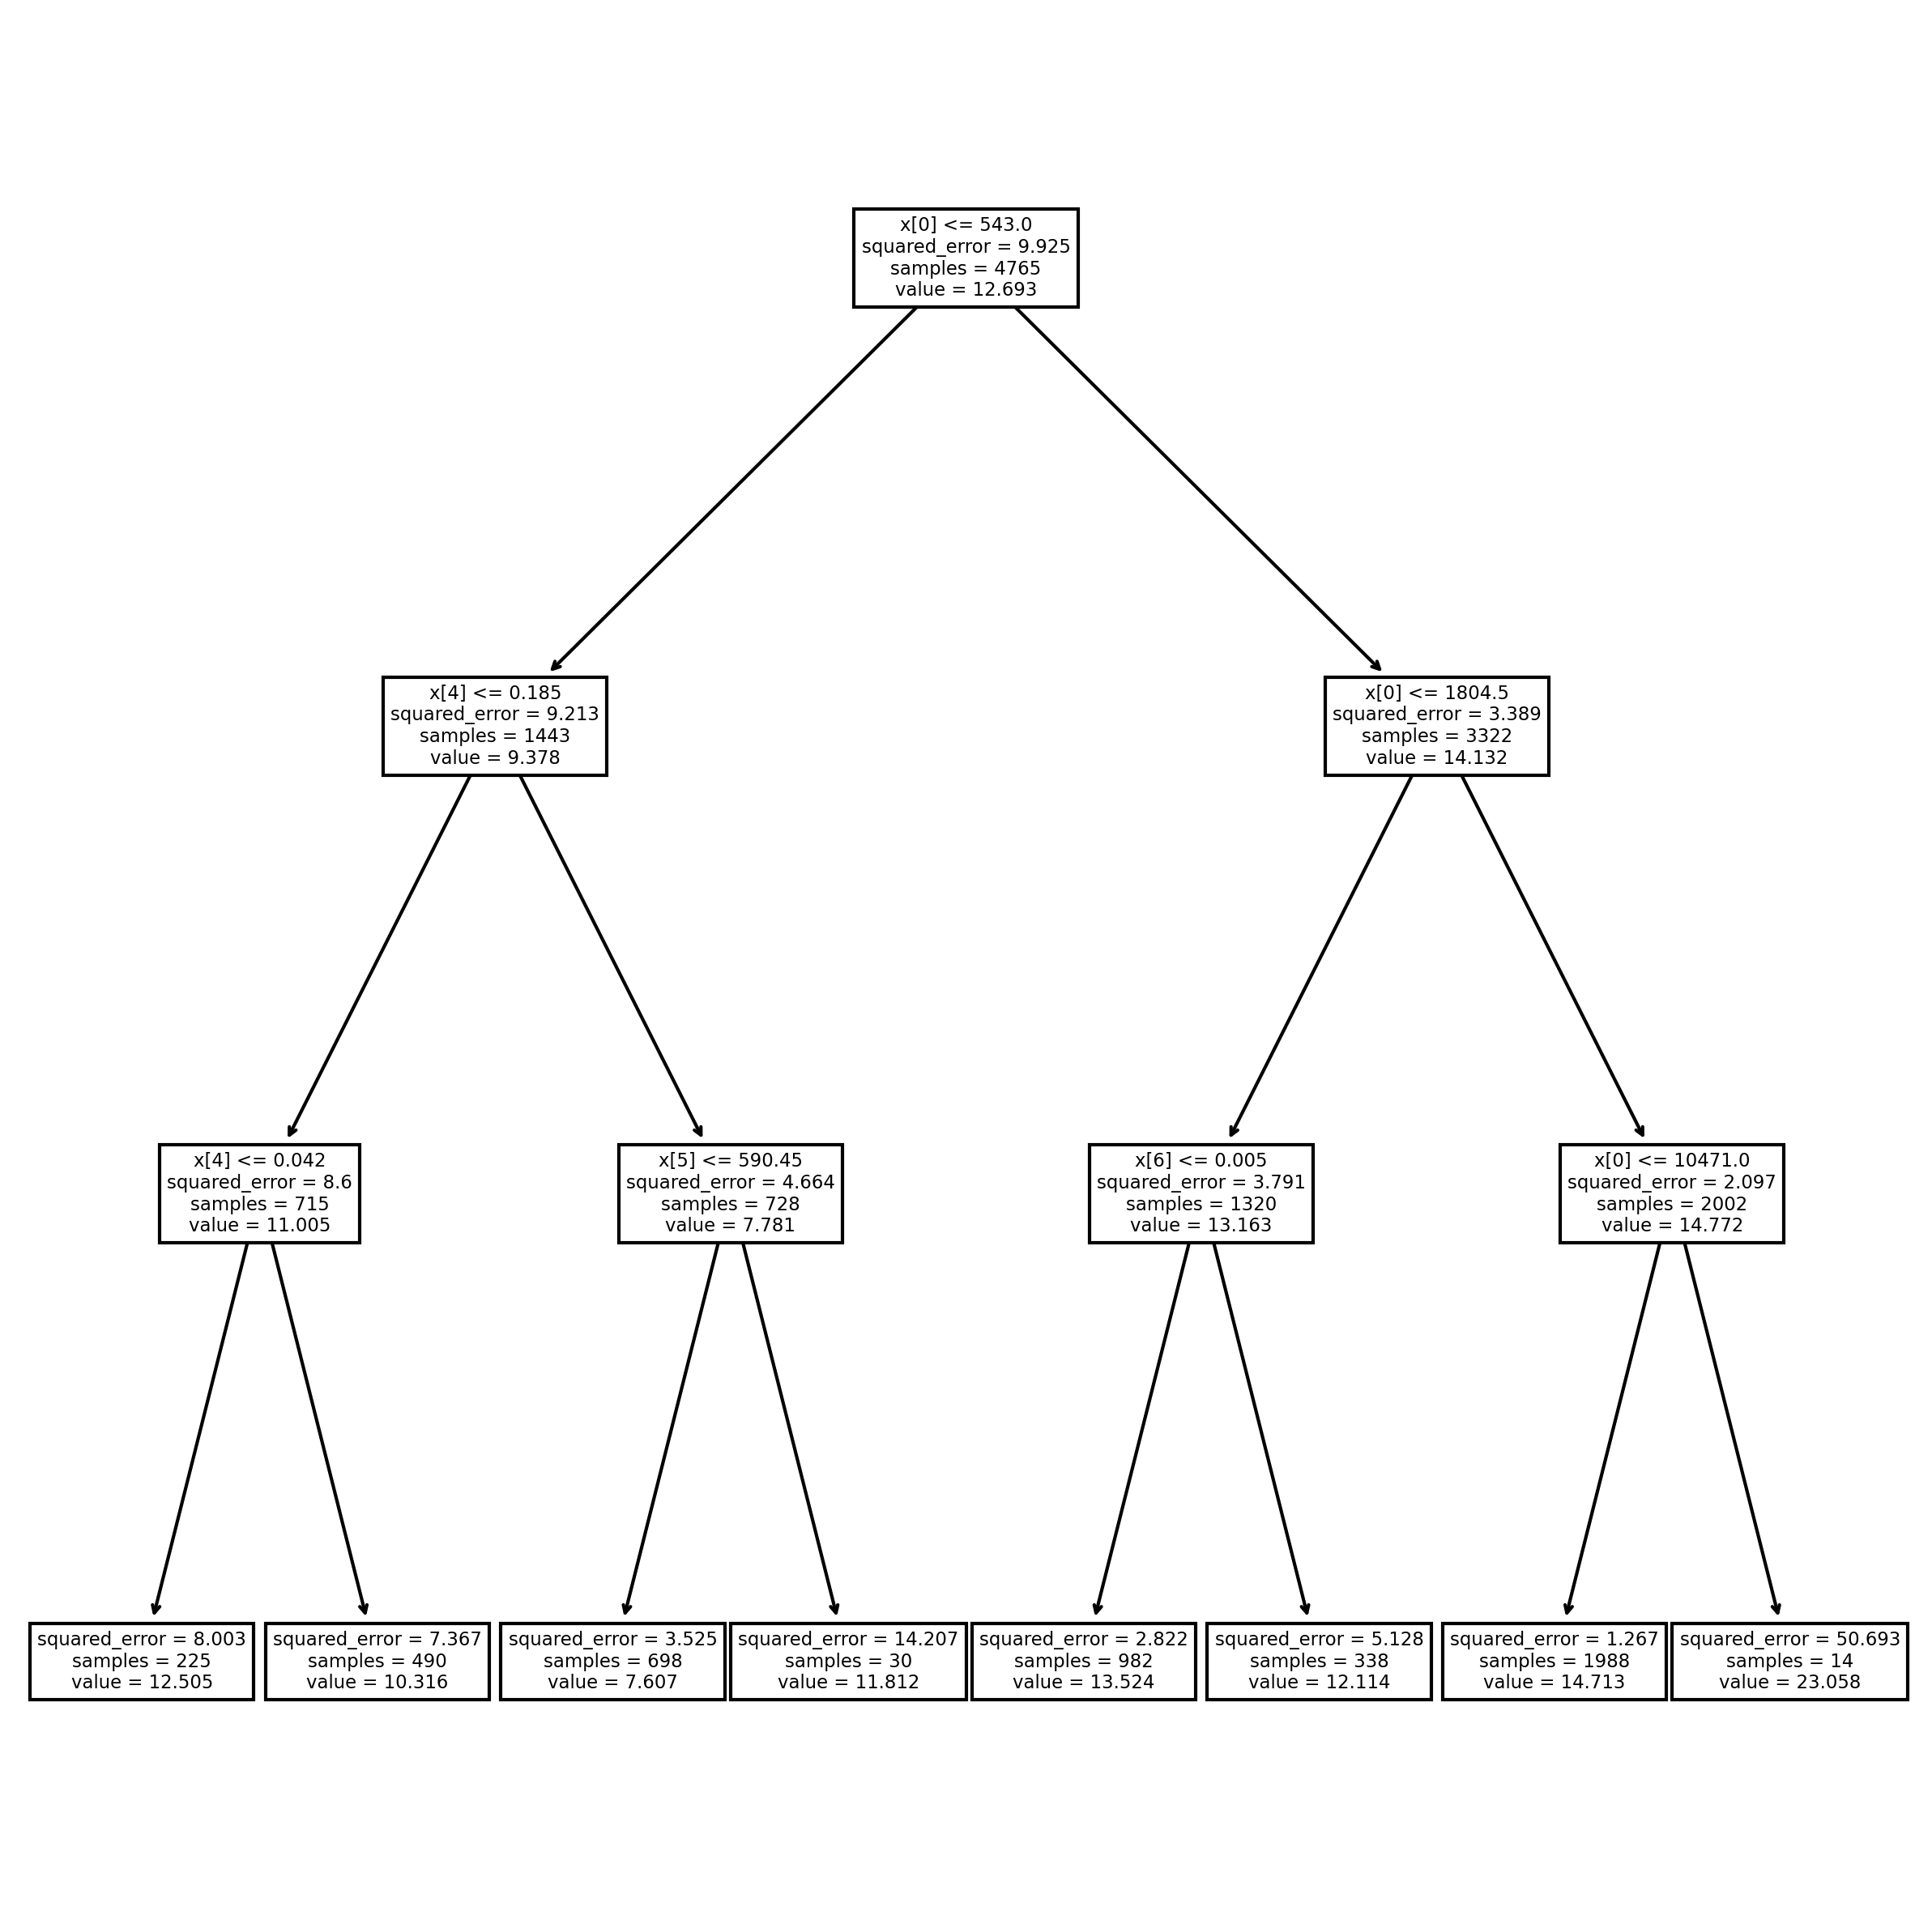

In [34]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
plot_tree(model)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train

,distance,year,mass x,radius x,oribital radius,orbital period,eccentricity
4572,97,2020,8.70,1.088,0.04040,0.010404,0.00
3870,2668,2016,7.70,0.240,0.10870,0.036140,0.00
5242,889,2008,1.42,1.250,0.05524,0.011225,0.00
1395,1073,2018,5.90,0.205,0.15270,0.061875,0.00
1556,582,2016,0.73,1.190,0.04217,0.009035,0.07
...,...,...,...,...,...,...,...
2032,1573,2016,1.24,1.070,0.15960,0.087064,0.00
0,304,2007,19.40,1.080,1.29000,0.892539,0.23
509,211,2020,9.71,0.275,0.13670,0.053662,0.06
874,64,2020,9.44,0.271,0.52800,0.422724,0.12


In [36]:
y_test

2034    14.28200
540      4.77044
4453    14.90400
4157    14.99300
4077    15.30800
          ...   
2698    15.02000
1558    13.54700
3806    12.28500
4258    15.75500
3050    14.36700
Name: stellar magnitude, Length: 953, dtype: float64

In [37]:
train_tree = DecisionTreeRegressor(max_depth = 3) #depth = how many layers
train_tree = train_tree.fit(x_train, y_train)

In [38]:
y_test_pred = train_tree.predict(x_test)
#y_test_pred

In [39]:
mean_squared_error(y_test, y_test_pred)

4.2765997975642005

In [40]:
y_train_pred = train_tree.predict(x_train)
#y_train_pred

In [41]:
mean_squared_error(y_train, y_train_pred)

3.1680730642148385

In [42]:
#Closest; max depth = 3 is best

In [43]:
train_tree4 = DecisionTreeRegressor(max_depth = 4) 
train_tree4 = train_tree4.fit(x_train, y_train)
y_test_pred4 = train_tree4.predict(x_test)
mean_squared_error(y_test, y_test_pred4)

3.996113477027311

In [44]:
y_train_pred4 = train_tree4.predict(x_train)
mean_squared_error(y_train, y_train_pred4)

2.7737037175337034

In [45]:
train_tree5 = DecisionTreeRegressor(max_depth = 5) 
train_tree5 = train_tree5.fit(x_train, y_train)
y_test_pred5 = train_tree5.predict(x_test)
mean_squared_error(y_test, y_test_pred5)

3.769768891366216

In [46]:
y_train_pred5 = train_tree5.predict(x_train)
mean_squared_error(y_train, y_train_pred5)

2.429478469962168

In [47]:
#Linear Regression

In [48]:
lm = smf.ols ("y ~ x", data = nasa_exo).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     679.2
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        18:44:29   Log-Likelihood:                -10578.
No. Observations:                4765   AIC:                         2.117e+04
Df Residuals:                    4757   BIC:                         2.122e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -224.3786     15.624    -14.361      0.000    -255.009    -193.748
x[0]           0.0009   1.88e-05     47.931      0.000       0.001       0.001
x[1]           0.1171      0.008     15.107      0.000       0.102       0.132
x[2]          -0.0102      0.002     -4.207      0.000      -0.015      -0.005
x[3]          -0.0181      0.053     -0.340      0.734      -0.123       0.087
x[4]          -0.0007      0.001     -0.896      0.371      -0.002       0.001
x[5]        6.219e-06   6.07e-06      1.024      0.306   -5.69e-06    1.81e-05
x[6]          -6.3511      0.236    -26.880      0.000      -6.814      -5.888
==============================================================================
Omnibus:                      398.491   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1281.460
Skew:                          -0.413   Prob(JB):                    5.43e-279
Kurtosis:                       5.402   Cond. No.                     8.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
lm.resid

0      -4.464404
1      -5.503281
2      -5.629434
3      -0.984467
4       1.208454
          ...   
5245   -1.879581
5246   -1.512644
5247    0.705334
5248    0.331240
5249    0.774951
Length: 4765, dtype: float64

<Axes: >

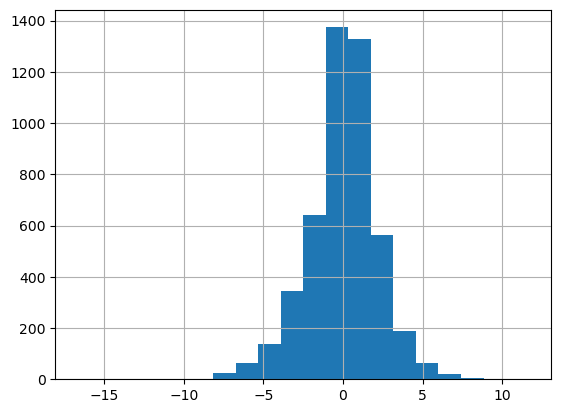

In [50]:
lm.resid.hist(bins = 20)

<Axes: xlabel='distance', ylabel='stellar magnitude'>

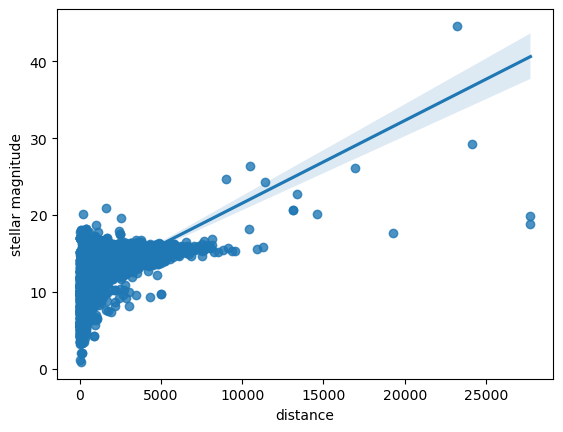

In [51]:
sns.regplot(x = "distance", y = "stellar magnitude", data = nasa_exo)

In [52]:
lm_nasa_exo = LinearRegression()
lm_nasa_exo.fit(x_train, y_train)

LinearRegression()

In [53]:
model_test_pred = lm_nasa_exo.predict(x_test)
mean_squared_error(y_test,model_test_pred)

5.676563788635573

In [54]:
model_train_pred = lm_nasa_exo.predict(x_train)
mean_squared_error(y_train,model_train_pred)

4.788942226624245

In [55]:
train_tree10 = DecisionTreeRegressor(max_depth = 10) 
train_tree10 = train_tree10.fit(x_train, y_train)
y_test_pred10 = train_tree10.predict(x_test)
y_train_pred10 = train_tree10.predict(x_train)
mean_squared_error(y_test, y_test_pred10)

3.9868847620851198

In [56]:
mean_squared_error(y_train, y_train_pred10)

1.0390375907094183

In [57]:
#Milestone 3
#K-Means Clustering

In [58]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix

In [59]:
nasa_exo

,name,distance,stellar magnitude,planet type,year,mass x,mass ssc,radius x,radius ssc,oribital radius,orbital period,eccentricity,detection method
0,11 Comae Berenices b,304,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


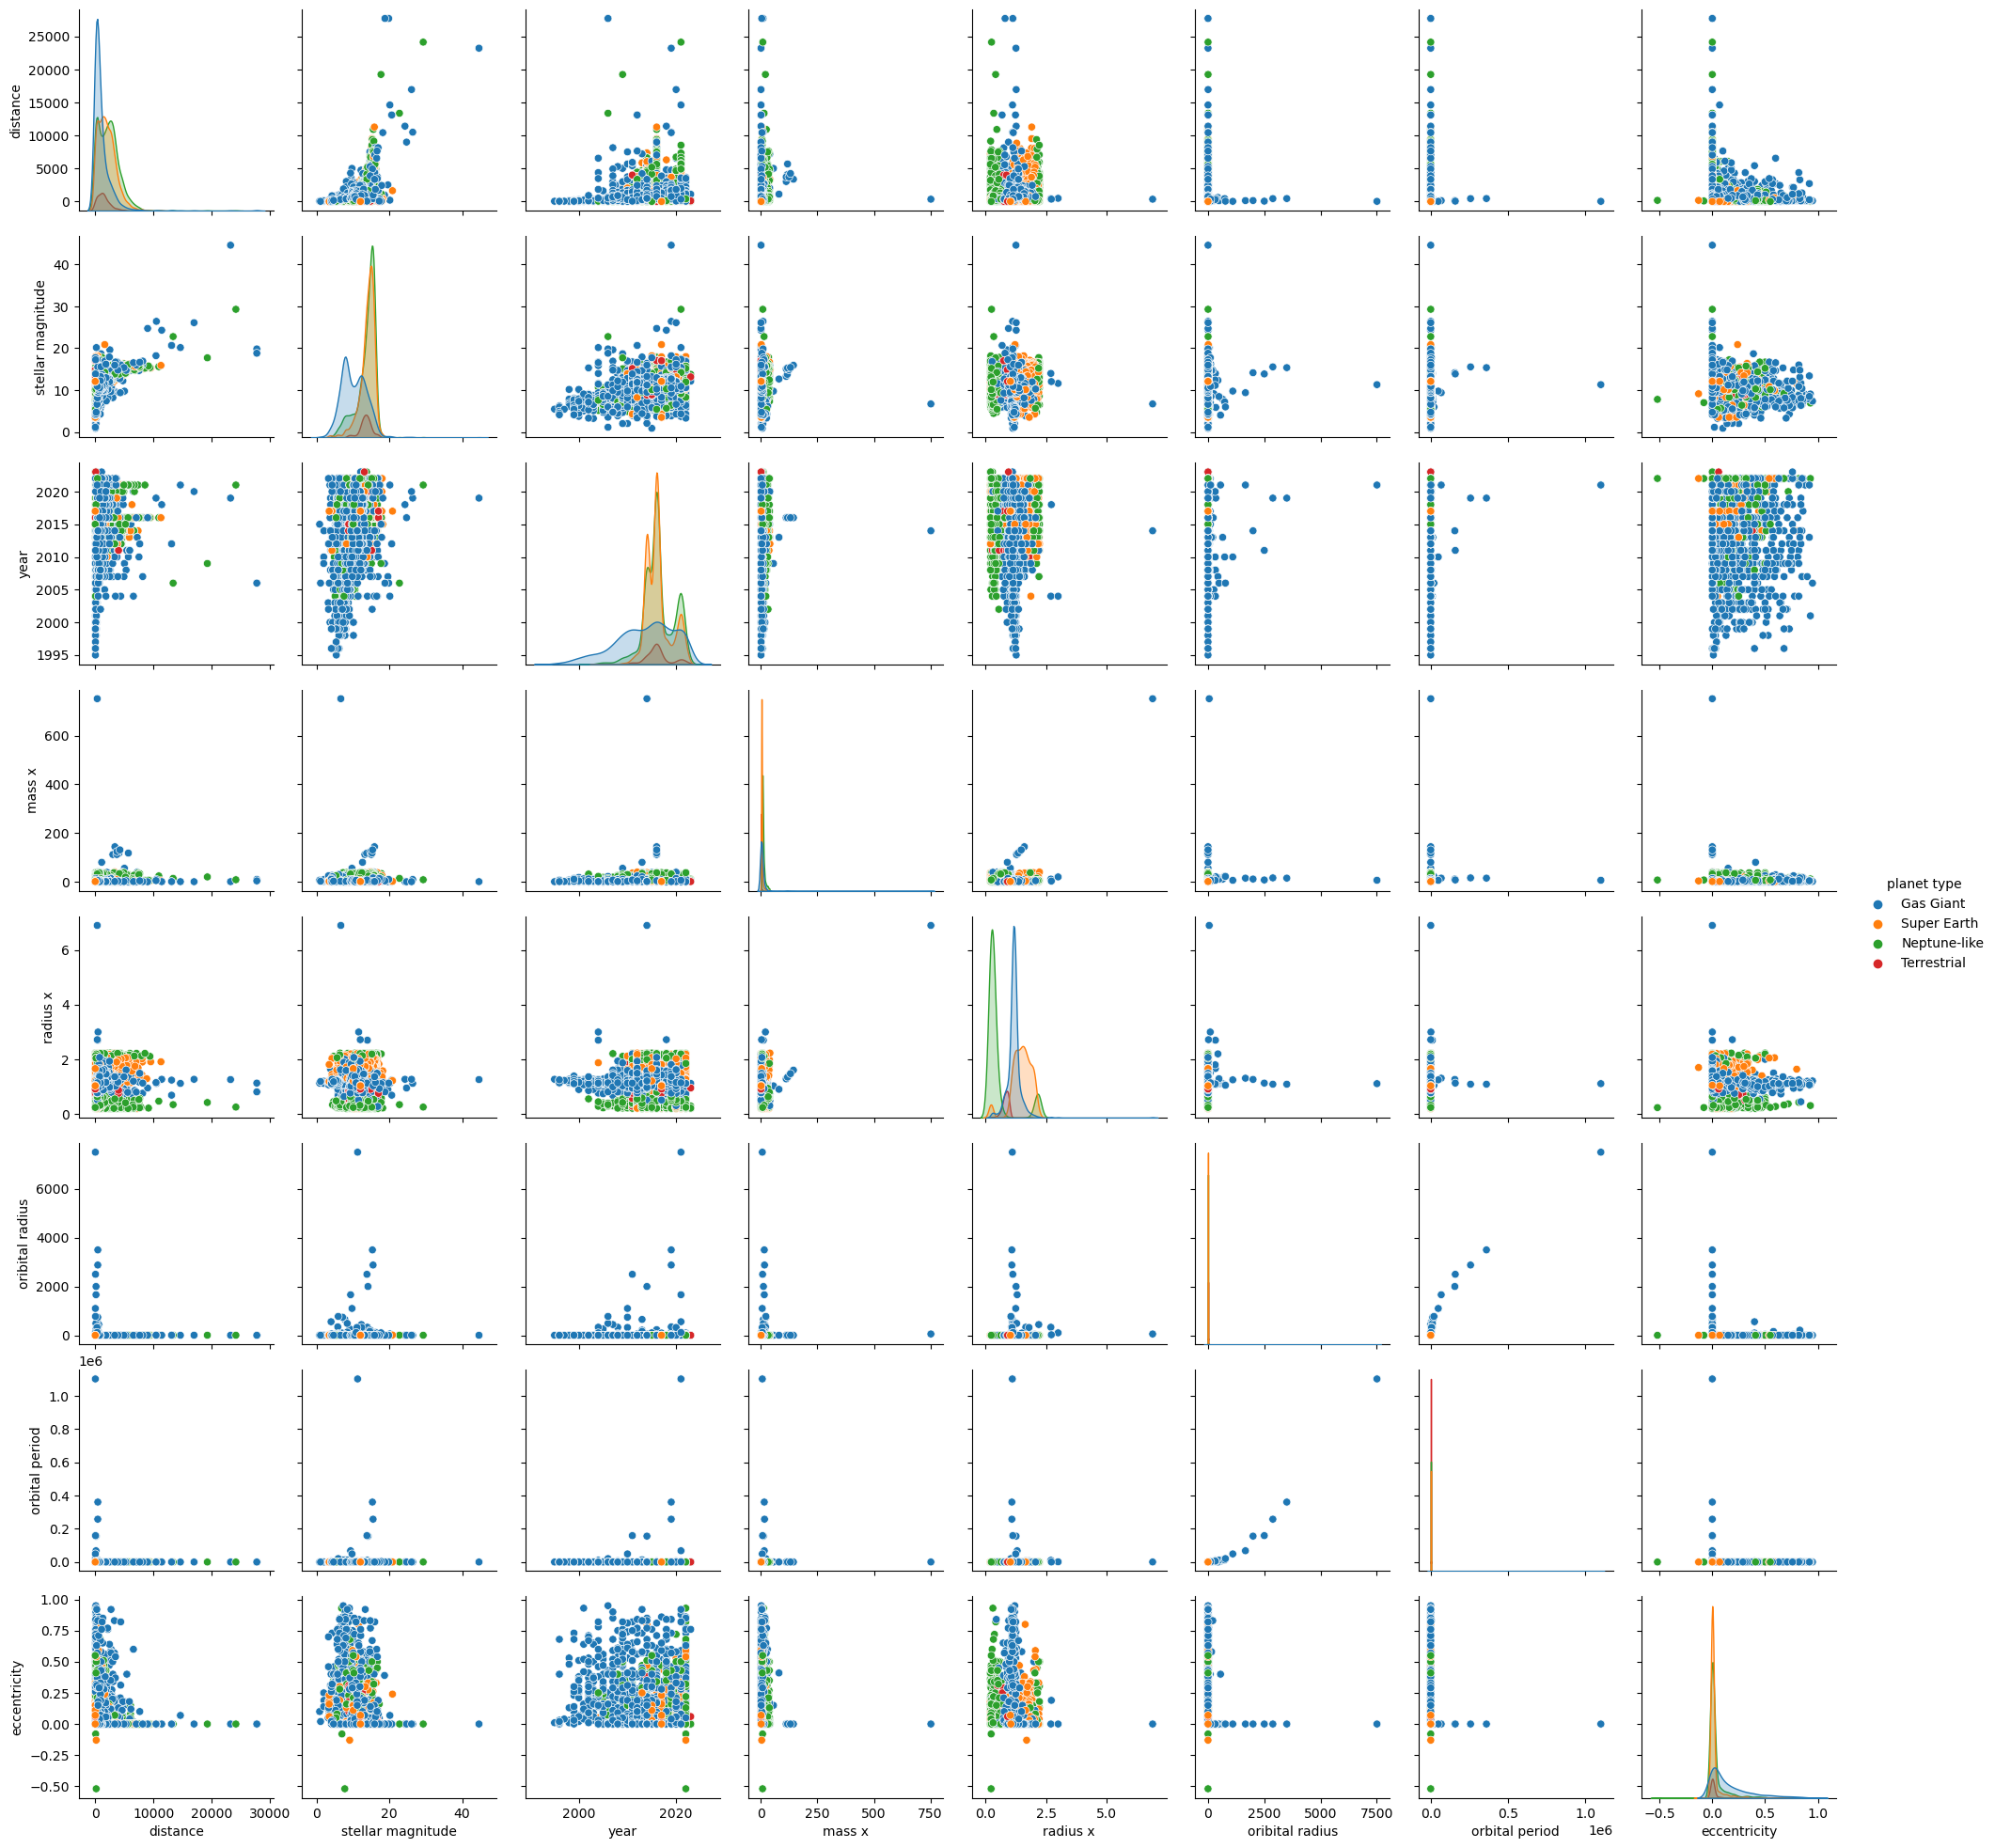

In [60]:
sns.pairplot(data = nasa_exo, hue = "planet type")

In [61]:
#quantitative variables
x = nasa_exo_tree[["distance", "year", "mass x" , "radius x" , "oribital radius" , "orbital period","eccentricity"]]
x

,distance,year,mass x,radius x,oribital radius,orbital period,eccentricity
0,304,2007,19.40000,1.080,1.290000,0.892539,0.23
1,409,2009,14.74000,1.090,1.530000,1.400000,0.08
2,246,2008,4.80000,1.150,0.830000,0.508693,0.00
3,58,2002,8.13881,1.120,2.773069,4.800000,0.37
4,69,1996,1.78000,1.200,1.660000,2.200000,0.68
...,...,...,...,...,...,...,...
5245,764,2019,0.70900,1.373,0.044210,0.007940,0.04
5246,357,2021,6.30000,1.140,115.000000,1176.500000,0.00
5247,12,2017,0.70000,0.913,0.016340,0.005476,0.06
5248,12,2017,1.14000,1.050,0.021560,0.008487,0.00


In [62]:
kmeans = KMeans(n_clusters= 4)
kmeans.fit(x)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


KMeans(n_clusters=4)

In [63]:
clusters = kmeans.predict(x)
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [64]:
nasa_exo["clusters"] = clusters
nasa_exo

,name,distance,stellar magnitude,planet type,year,mass x,mass ssc,radius x,radius ssc,oribital radius,orbital period,eccentricity,detection method,clusters
0,11 Comae Berenices b,304,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity,0
1,11 Ursae Minoris b,409,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity,0
2,14 Andromedae b,246,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity,0
3,14 Herculis b,58,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity,0
4,16 Cygni B b,69,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit,0
5246,YSES 2 b,357,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging,0
5247,YZ Ceti b,12,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity,0
5248,YZ Ceti c,12,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity,0


In [65]:
nasa_exo[nasa_exo["clusters"] == 1]


,name,distance,stellar magnitude,planet type,year,mass x,mass ssc,radius x,radius ssc,oribital radius,orbital period,eccentricity,detection method,clusters
84,COCONUTS-2 b,36,11.298,Gas Giant,2021,6.3,Jupiter,1.11,Jupiter,7506.0,1101369.9,0.0,Direct Imaging,1


In [66]:
nasa_exo[nasa_exo["clusters"] == 2]


,name,distance,stellar magnitude,planet type,year,mass x,mass ssc,radius x,radius ssc,oribital radius,orbital period,eccentricity,detection method,clusters
5036,USco1556 b,459,15.360,Gas Giant,2019,15.0,Jupiter,1.09,Jupiter,3500.0,360656.2,0.0,Direct Imaging,2
5037,USco1621 b,450,15.543,Gas Giant,2019,16.0,Jupiter,1.09,Jupiter,2880.0,257742.3,0.0,Direct Imaging,2


In [67]:
nasa_exo[nasa_exo["clusters"] == 3]


,name,distance,stellar magnitude,planet type,year,mass x,mass ssc,radius x,radius ssc,oribital radius,orbital period,eccentricity,detection method,clusters
320,GU Piscium b,155,14.146,Gas Giant,2014,11.3,Jupiter,1.265,Jupiter,2000.0,155788.8,0.0,Direct Imaging,3
5225,WD 0806-661 b,63,13.855,Gas Giant,2011,7.5,Jupiter,1.130,Jupiter,2500.0,158840.9,0.0,Direct Imaging,3


In [68]:
nasa_exo[nasa_exo["clusters"] == 0]


,name,distance,stellar magnitude,planet type,year,mass x,mass ssc,radius x,radius ssc,oribital radius,orbital period,eccentricity,detection method,clusters
0,11 Comae Berenices b,304,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity,0
1,11 Ursae Minoris b,409,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity,0
2,14 Andromedae b,246,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity,0
3,14 Herculis b,58,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity,0
4,16 Cygni B b,69,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit,0
5246,YSES 2 b,357,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging,0
5247,YZ Ceti b,12,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity,0
5248,YZ Ceti c,12,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity,0


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


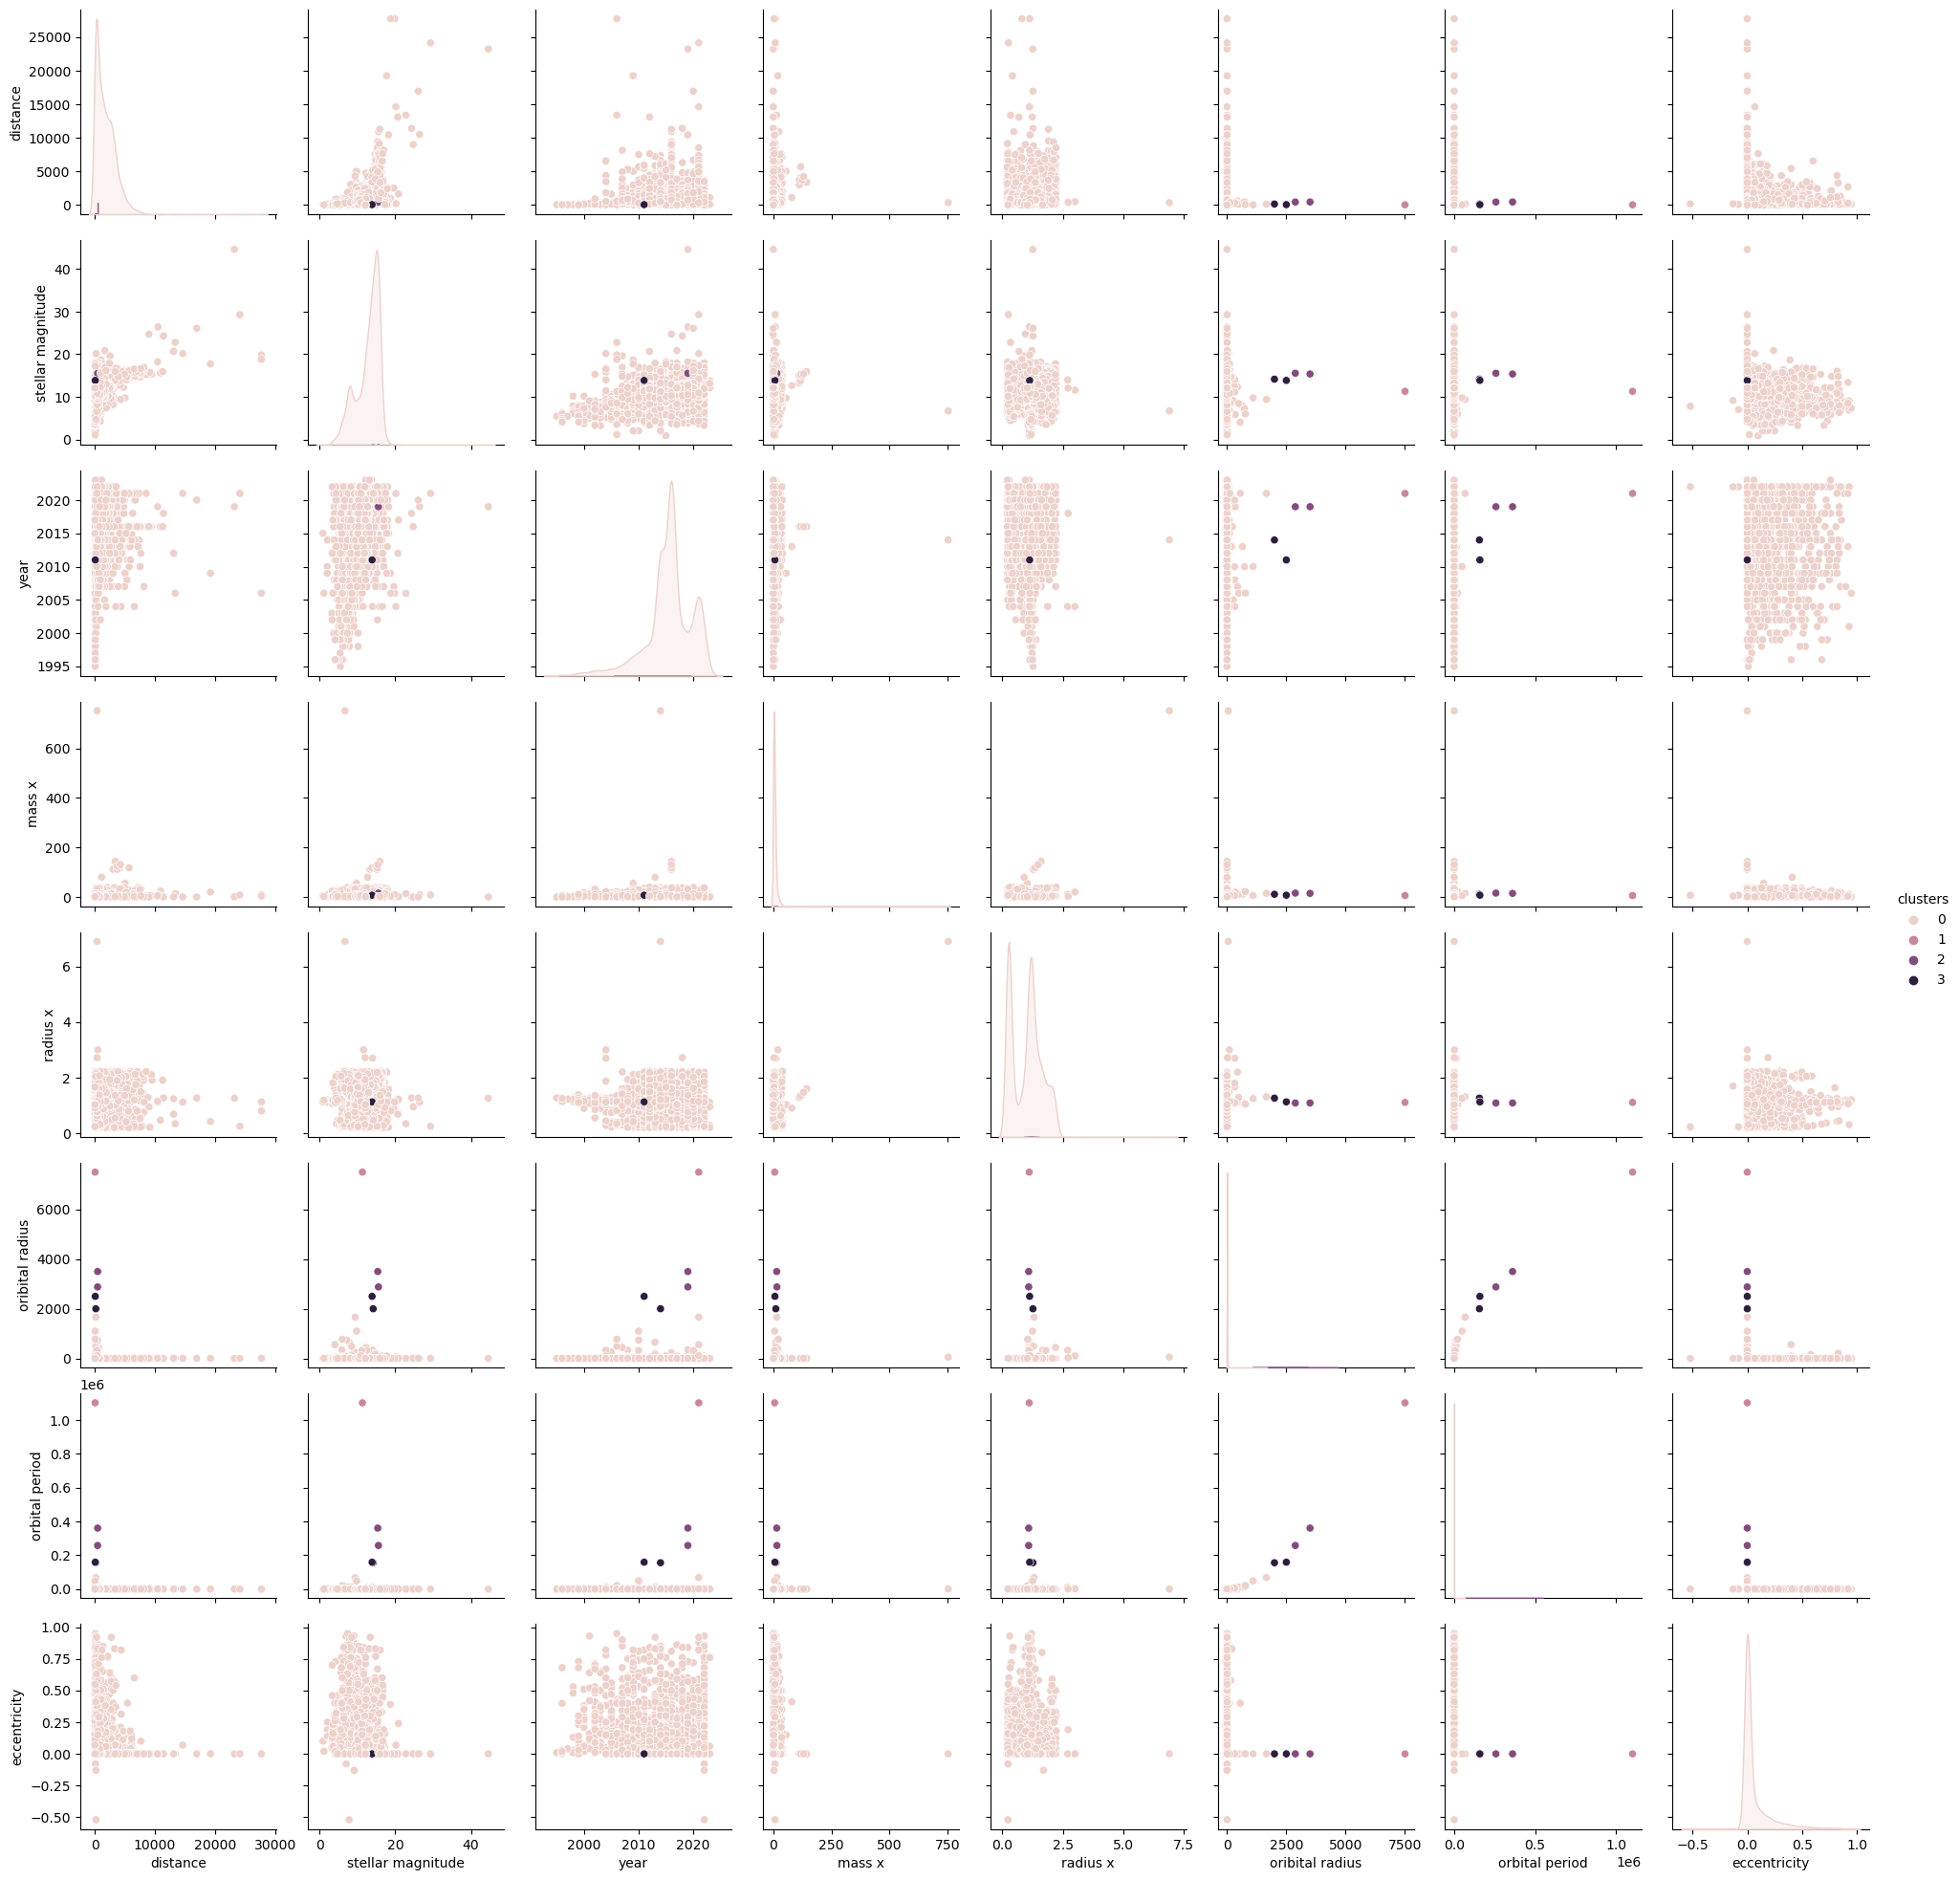

In [69]:
sns.pairplot(data = nasa_exo, vars = ["distance", "stellar magnitude", "year", "mass x", "radius x", "oribital radius", "orbital period", "eccentricity"], hue = "clusters")

In [70]:
cluster_map = {"0":"Gas Giant", "2":"Super Earth", "1":"Neptune-like", "3": "Terrestrial"} #Decide
nasa_exo["mapped_clusters"] = nasa_exo["clusters"].apply(str).map(cluster_map)
nasa_exo.head()

,name,distance,stellar magnitude,planet type,year,mass x,mass ssc,radius x,radius ssc,oribital radius,orbital period,eccentricity,detection method,clusters,mapped_clusters
0,11 Comae Berenices b,304,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity,0,Gas Giant
1,11 Ursae Minoris b,409,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity,0,Gas Giant
2,14 Andromedae b,246,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity,0,Gas Giant
3,14 Herculis b,58,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity,0,Gas Giant
4,16 Cygni B b,69,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity,0,Gas Giant


In [71]:
confusion_matrix(nasa_exo["planet type"], nasa_exo["mapped_clusters"])


array([[1430,    1,    2,    2],
       [1670,    0,    0,    0],
       [1477,    0,    0,    0],
       [ 183,    0,    0,    0]])

In [72]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [73]:
kmeans_scaled = KMeans(n_clusters = 4)
kmeans_scaled.fit(x_scaled)
clusters_scaled = kmeans_scaled.predict(x_scaled)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [74]:
nasa_exo["scaled_clusters"] = clusters_scaled

In [75]:
nasa_exo

,name,distance,stellar magnitude,planet type,year,mass x,mass ssc,radius x,radius ssc,oribital radius,orbital period,eccentricity,detection method,clusters,mapped_clusters,scaled_clusters
0,11 Comae Berenices b,304,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity,0,Gas Giant,1
1,11 Ursae Minoris b,409,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity,0,Gas Giant,1
2,14 Andromedae b,246,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity,0,Gas Giant,1
3,14 Herculis b,58,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity,0,Gas Giant,1
4,16 Cygni B b,69,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity,0,Gas Giant,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit,0,Gas Giant,0
5246,YSES 2 b,357,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging,0,Gas Giant,0
5247,YZ Ceti b,12,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity,0,Gas Giant,0
5248,YZ Ceti c,12,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity,0,Gas Giant,2


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


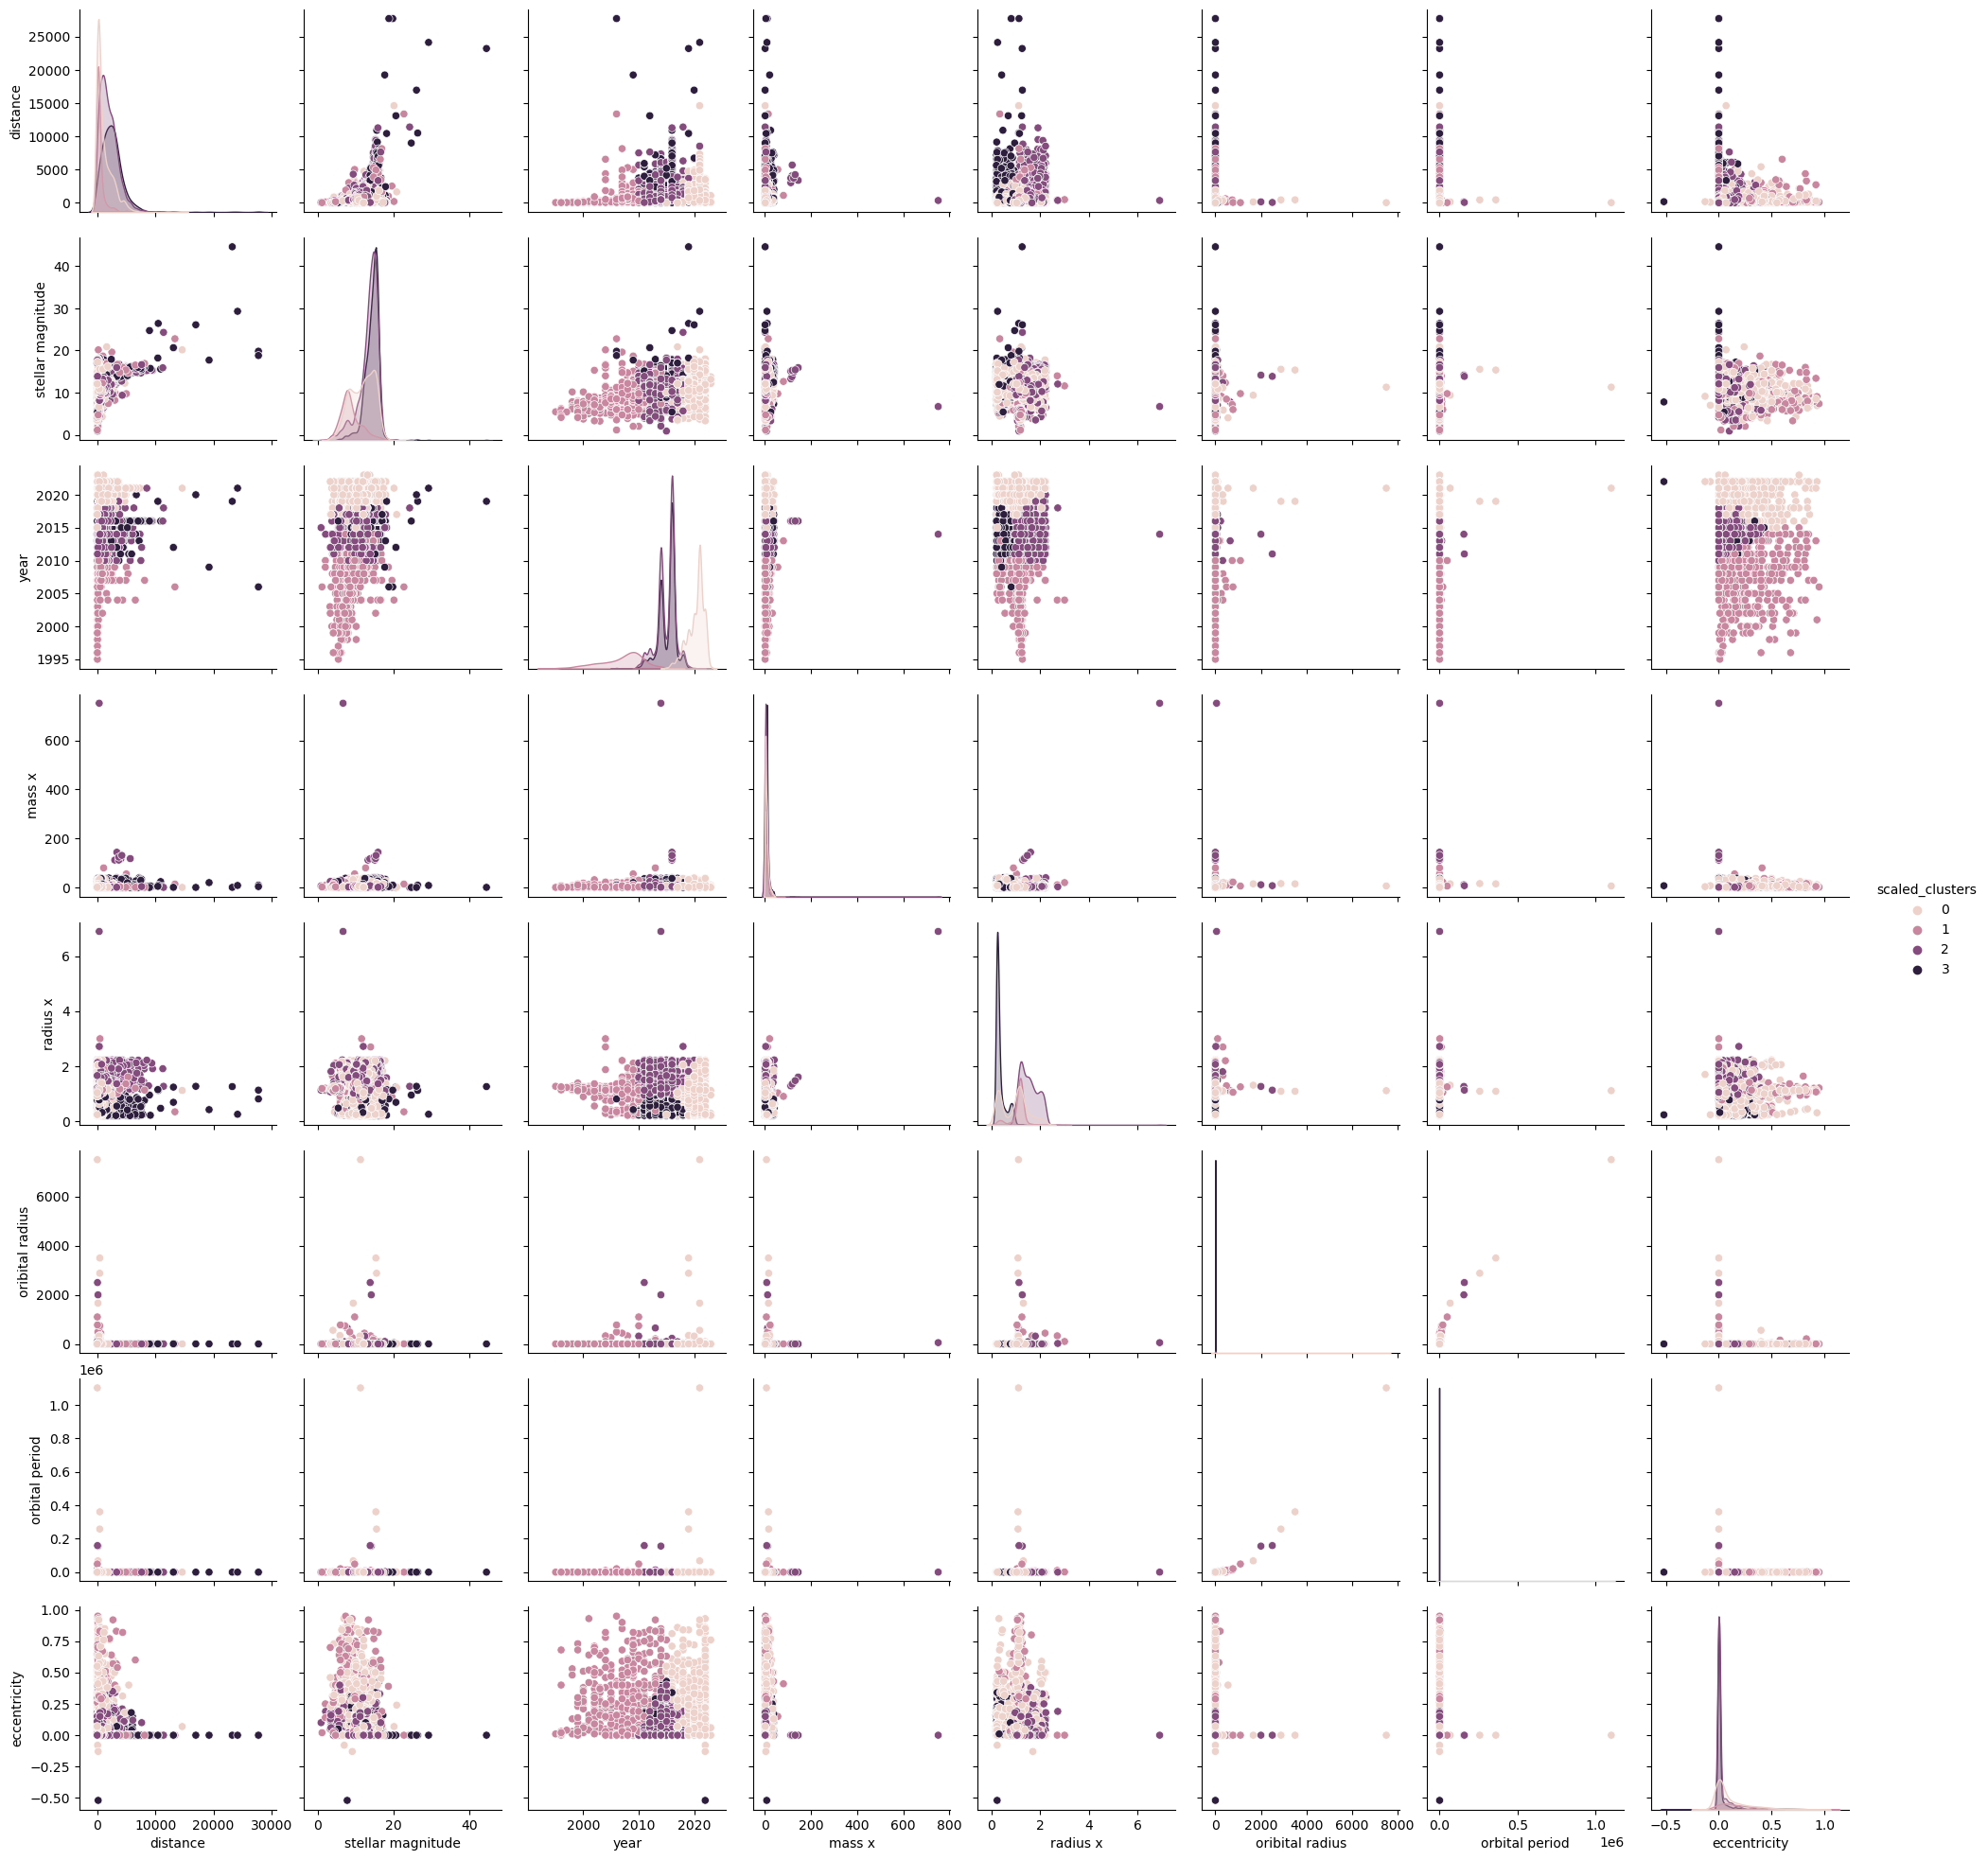

In [76]:
sns.pairplot(data = nasa_exo, vars = ["distance", "stellar magnitude", "year", "mass x", "radius x", "oribital radius", "orbital period", "eccentricity"], hue = "scaled_clusters")

In [77]:
cluster_scaled_map = {"0":"Gas Giant", "2":"Super Earth", "1":"Neptune-like", "3": "Terrestrial"} #Decide
nasa_exo["clusters_scaled"] = nasa_exo["scaled_clusters"].apply(str).map(cluster_scaled_map)
nasa_exo.head()

,name,distance,stellar magnitude,planet type,year,mass x,mass ssc,radius x,radius ssc,oribital radius,orbital period,eccentricity,detection method,clusters,mapped_clusters,scaled_clusters,clusters_scaled
0,11 Comae Berenices b,304,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity,0,Gas Giant,1,Neptune-like
1,11 Ursae Minoris b,409,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity,0,Gas Giant,1,Neptune-like
2,14 Andromedae b,246,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity,0,Gas Giant,1,Neptune-like
3,14 Herculis b,58,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity,0,Gas Giant,1,Neptune-like
4,16 Cygni B b,69,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity,0,Gas Giant,1,Neptune-like


In [78]:
confusion_matrix(nasa_exo["planet type"], nasa_exo["clusters_scaled"])


array([[ 450,  468,  416,  101],
       [ 429,   57,  146, 1038],
       [ 296,    6, 1122,   53],
       [  36,    0,   23,  124]])